# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/EvaluationProjects/Data_Train_Flight.csv')
train_df['DataSet']='Train'

In the training set we have 10683 rows and 11 columns

In [3]:
test_df=pd.read_csv('C:/Users/yn/Desktop/Yuvi/DataTrained/EvaluationProjects/Test_set_Flight.csv')
test_df['DataSet']='Test'

In the test set we have 2671 rows and 10 columns.

In [4]:
df=pd.concat([train_df,test_df],axis=0)
df.shape

(13354, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  DataSet          13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


## Exploratory Data Analysis

In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
DataSet               0
dtype: int64

We have 1 missing value in Route and Total_stops.

In [8]:
print((train_df['Price']==np.nan).sum())
print((train_df['Price']=='').sum())
print((train_df['Price']==' ').sum())

0
0
0


We do not have any missing values in the target variable Price

In [9]:
for col in df.columns:
    print(col)
    print("================================")
    print(df[col].value_counts(),'\n')

Airline
Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64 

Date_of_Journey
18/05/2019    633
6/06/2019     630
12/06/2019    628
9/05/2019     628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     355
1/05/2019     339
1/04/2019     335
12/05/2019    327
3/03/2019     280
9/03/2019     255
18/03/2019

In [10]:
df['Airline']=df['Airline'].replace({'Jet Airways Business':'Jet Airways','Multiple carriers Premium economy':'Multiple carriers','Vistara Premium economy':'Vistara'})

In [11]:
df['Airline'].value_counts()

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

In [12]:
df['Destination']=df['Destination'].replace({'New Delhi':'Delhi'})

In [13]:
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [14]:
df['Additional_Info']=df['Additional_Info'].replace({'No Info':'No info','1 Long layover':'Long layover','2 Long layover':'Long layover','1 Short layover':'Short layover'})

In [15]:
df['Additional_Info'].value_counts()

No info                         10496
In-flight meal not included      2426
No check-in baggage included      396
Long layover                       21
Change airports                     8
Business class                      5
Red-eye flight                      1
Short layover                       1
Name: Additional_Info, dtype: int64

Lets split the date of journey column to journey date, journey month and journey year.

In [16]:
df['Journey_Date']=[pd.to_datetime(x).day for x in df['Date_of_Journey']]
df['Journey_Month']=[pd.to_datetime(x).month for x in df['Date_of_Journey']]
df['Journey_Year']=[pd.to_datetime(x).year for x in df['Date_of_Journey']]

Now lets drop the Date_of_Journey column

In [17]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

Lets split the duration column to duration_hour and duration_mins.

In [18]:
import re

In [19]:
def split_duration_hour(x):
    pattern=re.compile('(\d+)h')
    if(pattern.search(x)):
        return pattern.search(x).group(1)
    else:
        return 0

In [20]:
def split_duration_min(x):
    pattern=re.compile('(\d+)m')
    if(pattern.search(x)):
        return pattern.search(x).group(1)
    else:
        return 0


In [21]:
df['Duration_hour']=[split_duration_hour(x) for x in df['Duration']]
df['Duration_mins']=[split_duration_min(x) for x in df['Duration']]

In [22]:
df.drop(['Duration'],axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   DataSet          13354 non-null  object 
 10  Journey_Date     13354 non-null  int64  
 11  Journey_Month    13354 non-null  int64  
 12  Journey_Year     13354 non-null  int64  
 13  Duration_hour    13354 non-null  object 
 14  Duration_mins    13354 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 1.6+ MB


In [24]:
df['Total_Stops']=[str(x).replace('non-stop','0 stop') for x in df['Total_Stops']]

In [25]:
def remove_stop(x):
    pattern=re.compile('(\d+) stop')
    if(pattern.search(x)):
        return pattern.search(x).group(1)
    else:
        return np.nan

In [26]:
df['Total_Stops']=[remove_stop(x) for x in df['Total_Stops']]

In [27]:
df['Total_Stops'].value_counts()

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

In [28]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'Price', 'DataSet', 'Journey_Date',
       'Journey_Month', 'Journey_Year', 'Duration_hour', 'Duration_mins'],
      dtype='object')

In [29]:
df["Dep_Time_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

In [30]:
df["Dep_Time_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [31]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [32]:
df["Arrival_Time_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

In [33]:
df["Arrival_Time_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

In [34]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  object 
 1   Source             13354 non-null  object 
 2   Destination        13354 non-null  object 
 3   Route              13353 non-null  object 
 4   Total_Stops        13353 non-null  object 
 5   Additional_Info    13354 non-null  object 
 6   Price              10683 non-null  float64
 7   DataSet            13354 non-null  object 
 8   Journey_Date       13354 non-null  int64  
 9   Journey_Month      13354 non-null  int64  
 10  Journey_Year       13354 non-null  int64  
 11  Duration_hour      13354 non-null  object 
 12  Duration_mins      13354 non-null  object 
 13  Dep_Time_hour      13354 non-null  int64  
 14  Dep_Time_min       13354 non-null  int64  
 15  Arrival_Time_hour  13354 non-null  int64  
 16  Arrival_Time_min   1335

In [36]:
df['Duration_hour']=df['Duration_hour'].astype(int)

In [37]:
df['Duration_mins']=df['Duration_mins'].astype(int)

## Data Visualization

In [38]:
train_df=df[df['DataSet']=='Train']
test_df=df[df['DataSet']=='Test']

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_Date'}>,
        <AxesSubplot:title={'center':'Journey_Month'}>],
       [<AxesSubplot:title={'center':'Journey_Year'}>,
        <AxesSubplot:title={'center':'Duration_hour'}>,
        <AxesSubplot:title={'center':'Duration_mins'}>],
       [<AxesSubplot:title={'center':'Dep_Time_hour'}>,
        <AxesSubplot:title={'center':'Dep_Time_min'}>,
        <AxesSubplot:title={'center':'Arrival_Time_hour'}>],
       [<AxesSubplot:title={'center':'Arrival_Time_min'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

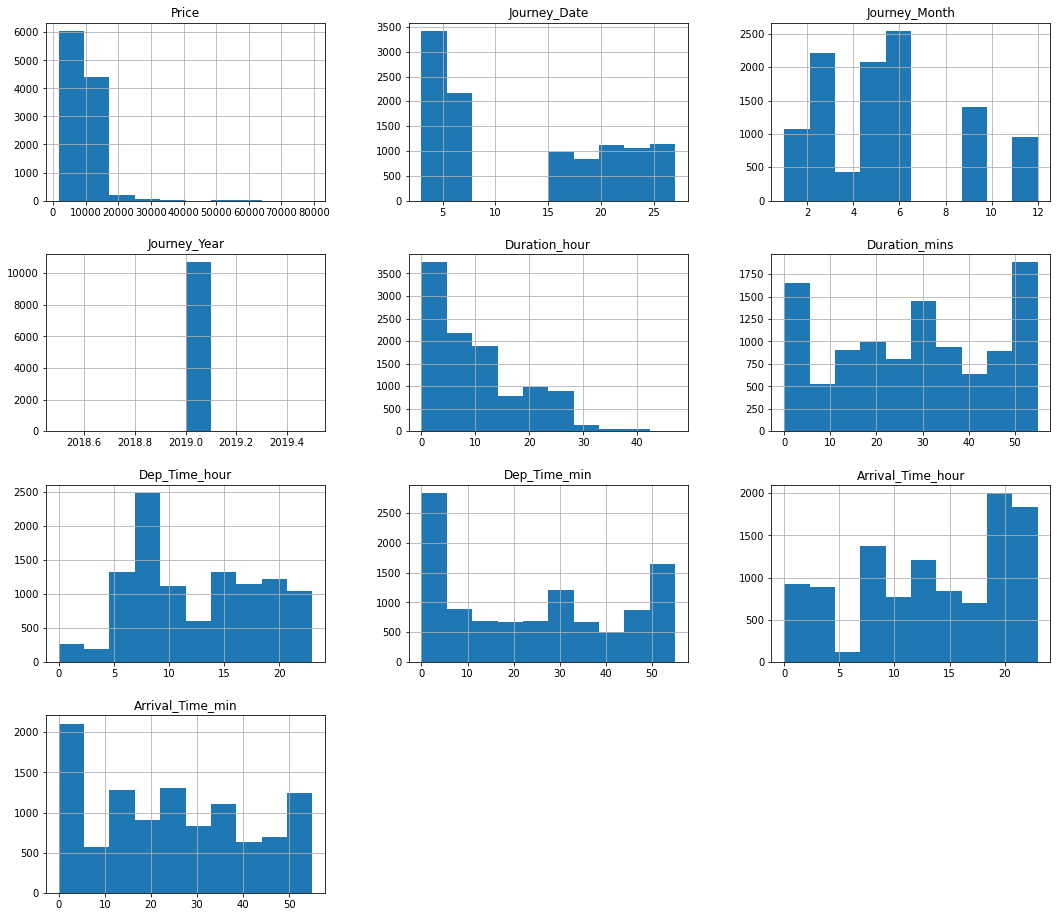

In [39]:
train_df.hist(figsize=(18,16))

From the above plot we can see journey year is 2019 for all the records as the complete dataset has information on the year 2019, lets drop the column.

In [40]:
df.drop(['Journey_Year'],axis=1,inplace=True)

### Univariate Analysis

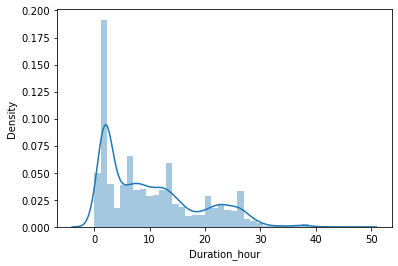

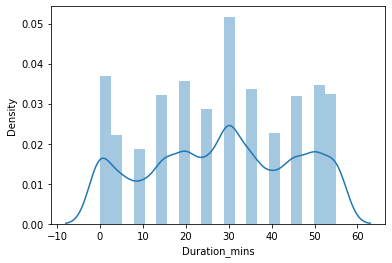

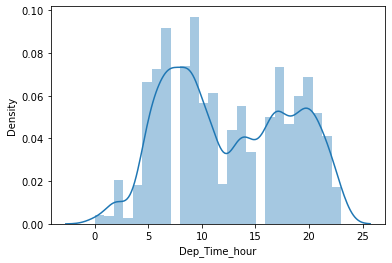

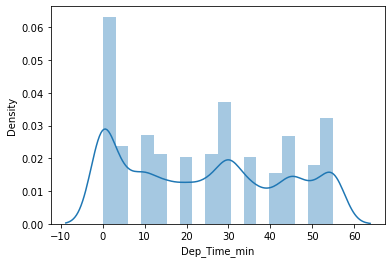

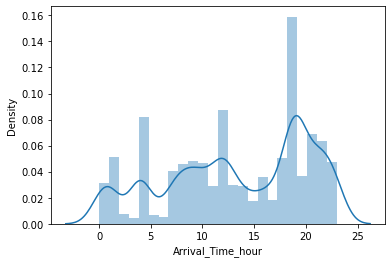

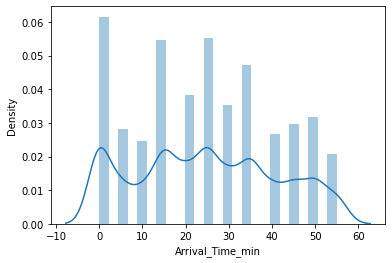

In [537]:
continous_features=['Duration_hour','Duration_mins','Dep_Time_hour','Dep_Time_min','Arrival_Time_hour','Arrival_Time_min']
for col in continous_features:
    sns.distplot(train_df[col])
    plt.show()

From the above plot we can see that all the data are not normally distributed.

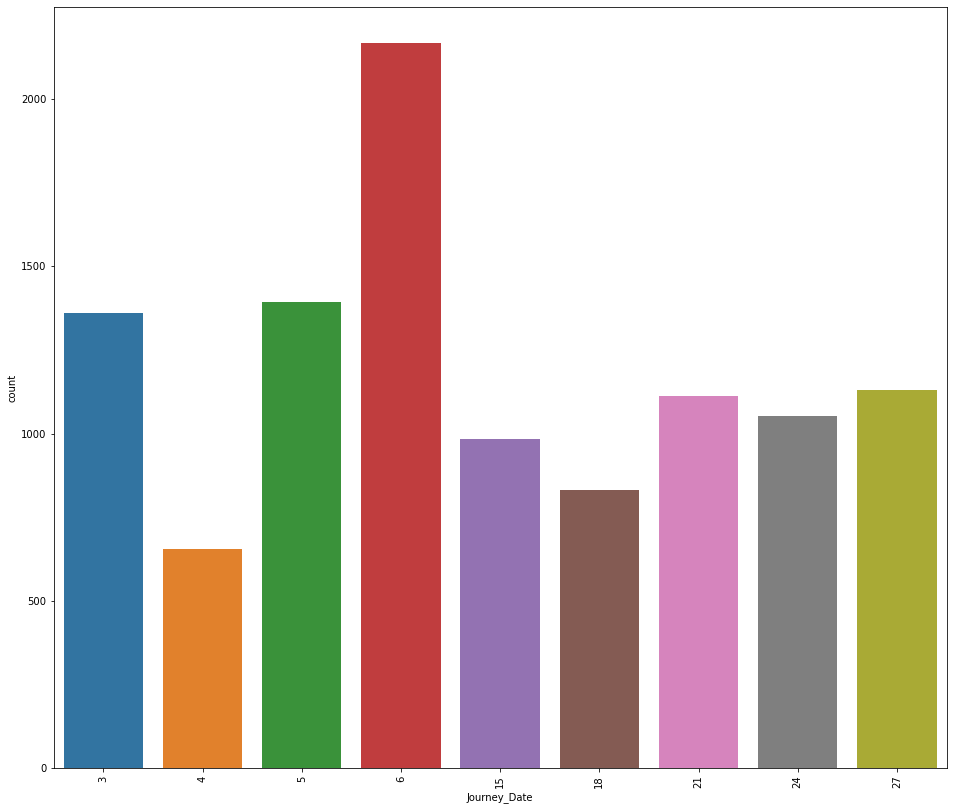

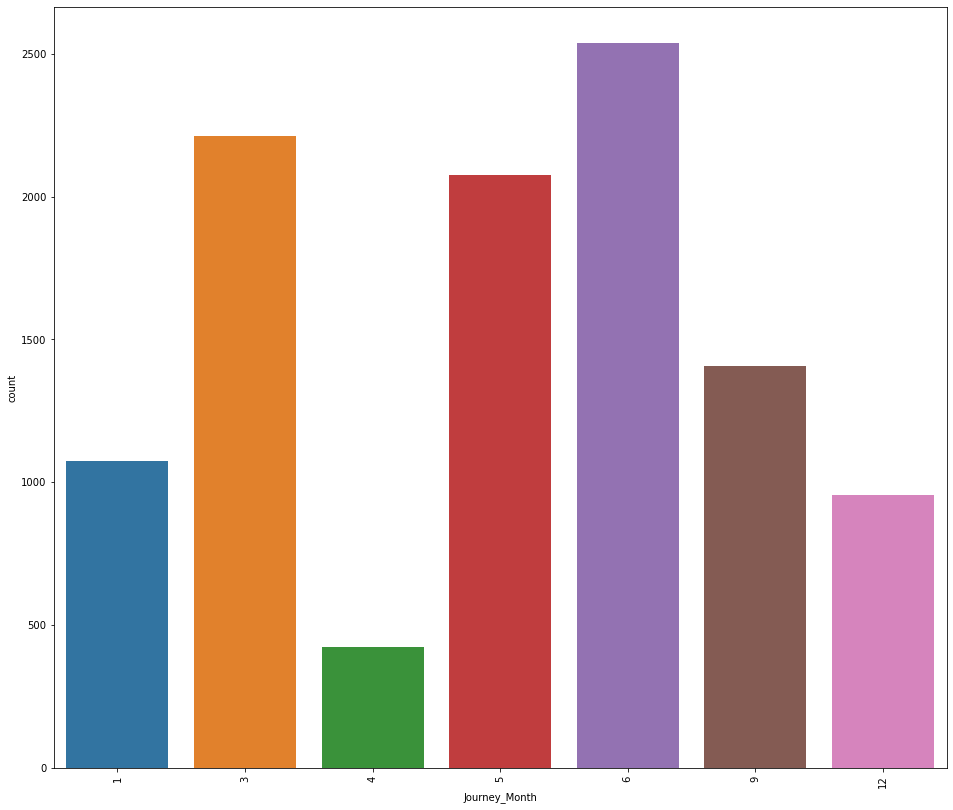

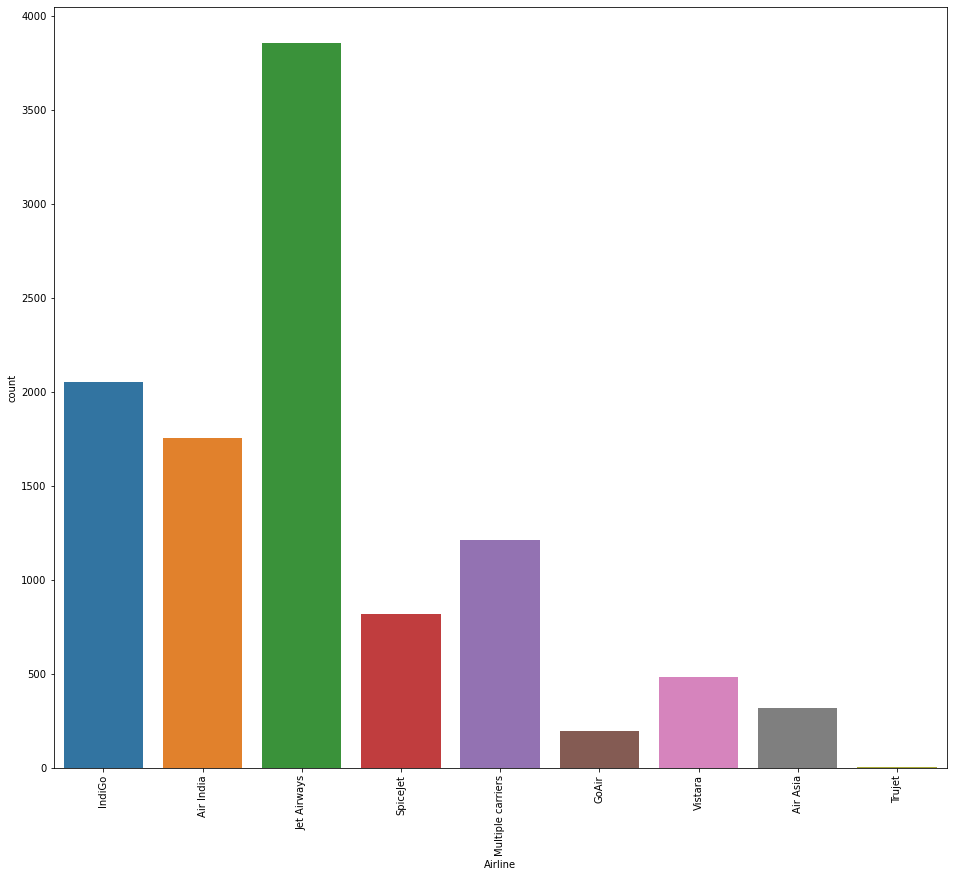

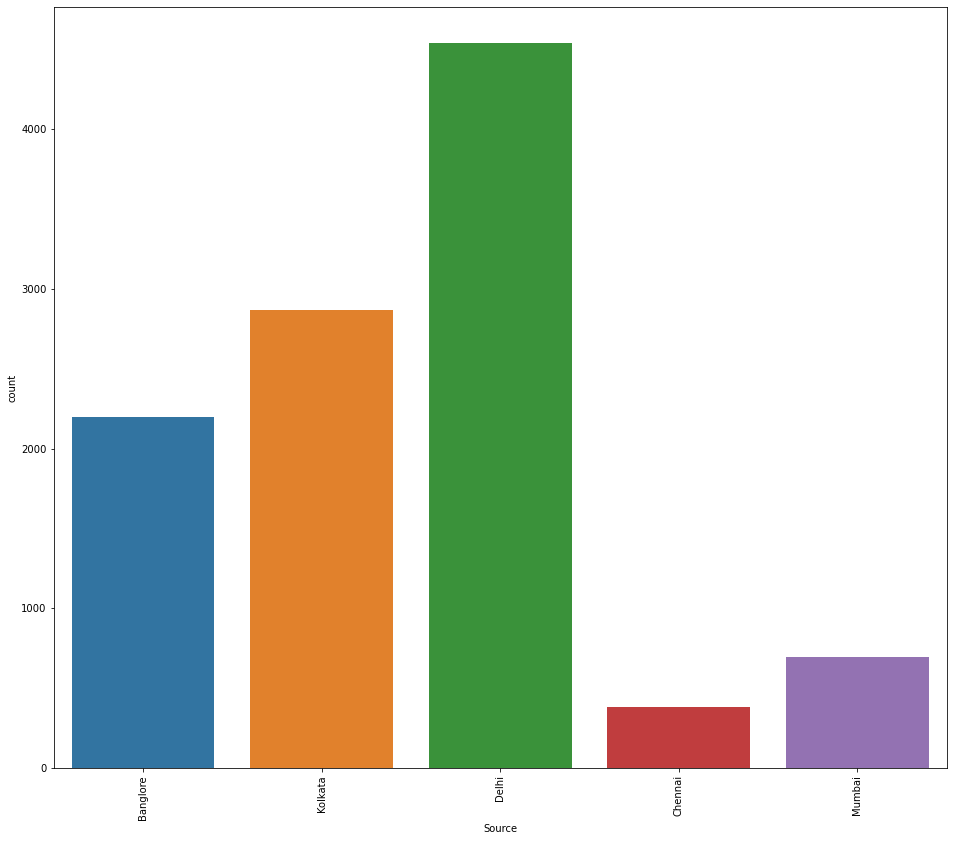

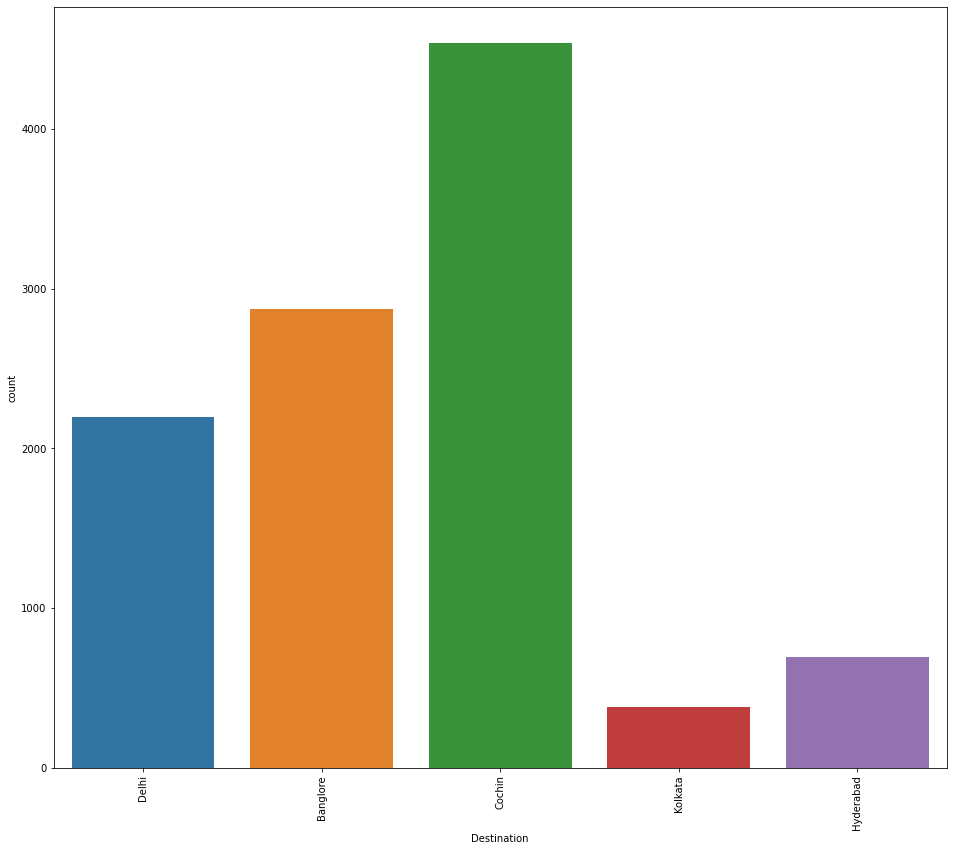

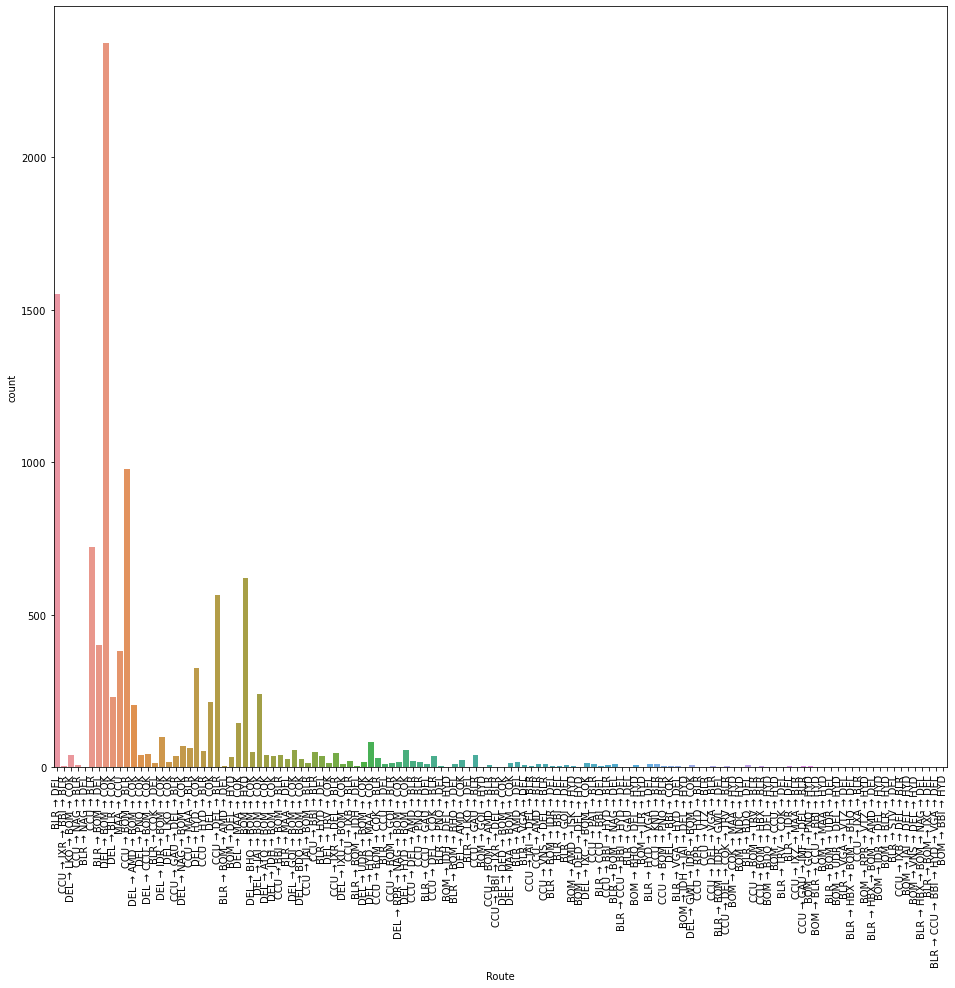

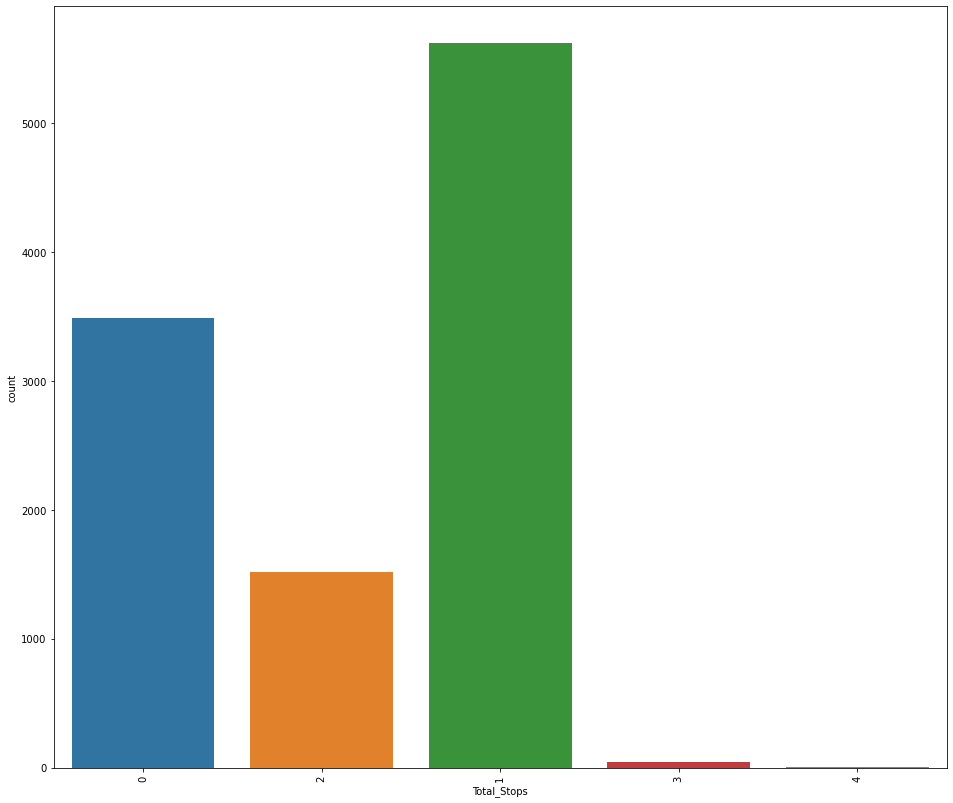

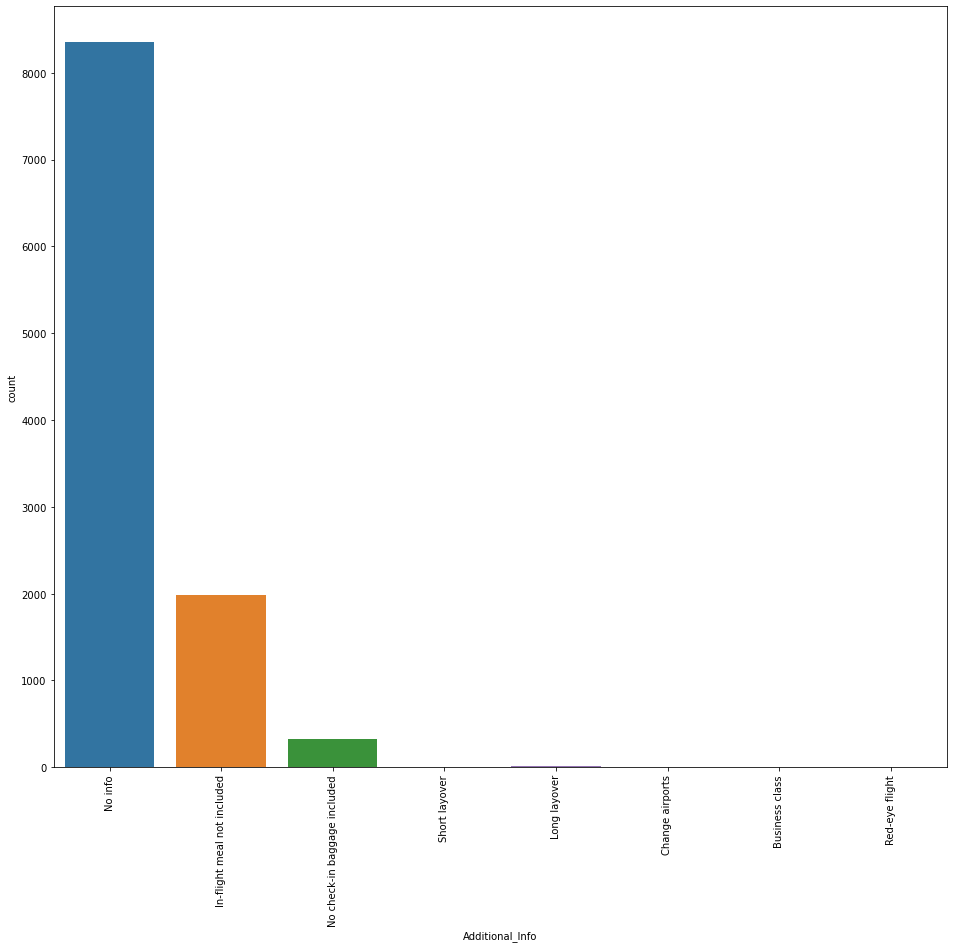

In [538]:
categorical_features=['Journey_Date','Journey_Month','Airline','Source','Destination','Route','Total_Stops','Additional_Info']
for col in categorical_features:
    plt.figure(figsize=(16,14))
    sns.countplot(train_df[col])
    plt.xticks(rotation=90)
    plt.show()

Observations from the above plots:
1. There are more flights flied on date 6.
2. More flights flied in the month of June.
3. Most of the flights belongs to Jet Airways airlines.
4. More flights started from the source location Delhi and followed by Kolkata.
5. Most of the flights were travelled to the destination Cochin.
6. DEL-BOM-COK(Delhi-Mumbai-Cochin) is the route, where most of the flights travelled.
7. We have more flights which has 1 stop in between source and destination.

### Bivariate Analysis

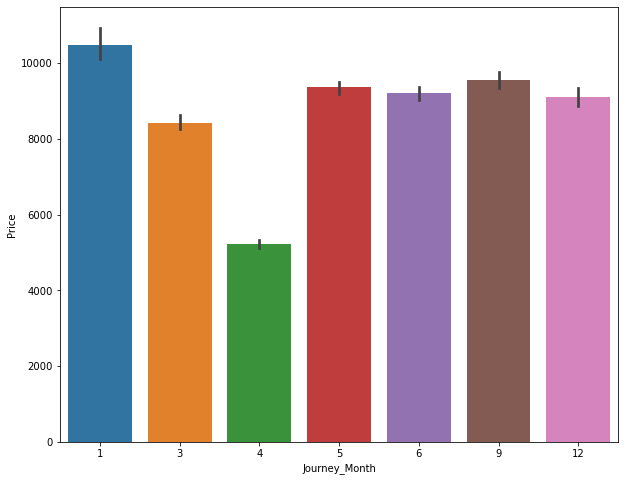

In [539]:
plt.figure(figsize=(10,8))
sns.barplot(train_df['Journey_Month'],train_df['Price'])
plt.show()

Observations from above plot:
1. Flight price was high in the month of January and low in the month of April.

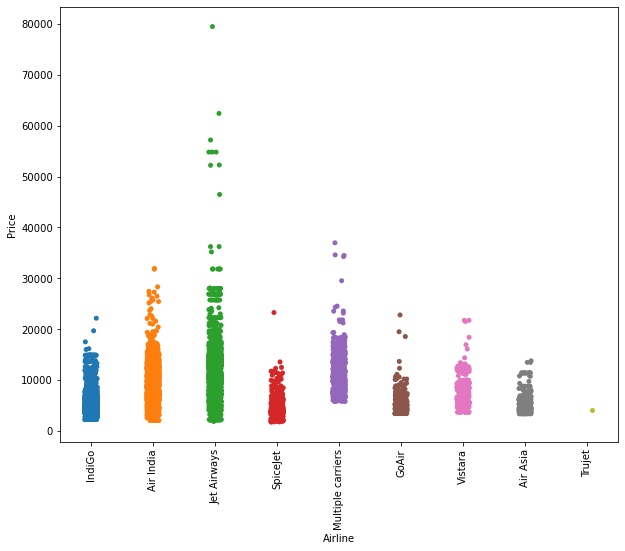

In [540]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.stripplot(train_df['Airline'],train_df['Price'])
plt.show()

Observation from above plot:
1. Flight ticket price in Jet Airways is costlier than other airline services.

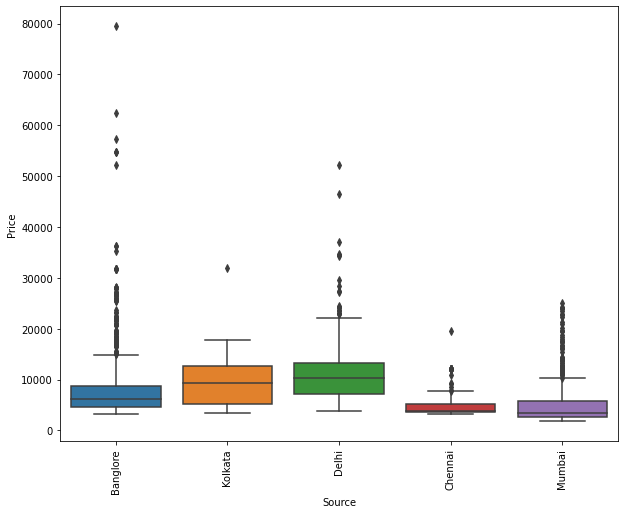

In [425]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.boxplot(train_df['Source'],train_df['Price'])
plt.show()

Observations from above plot:
1. Price of the tickets from source Delhi is compartively higher than other flights.

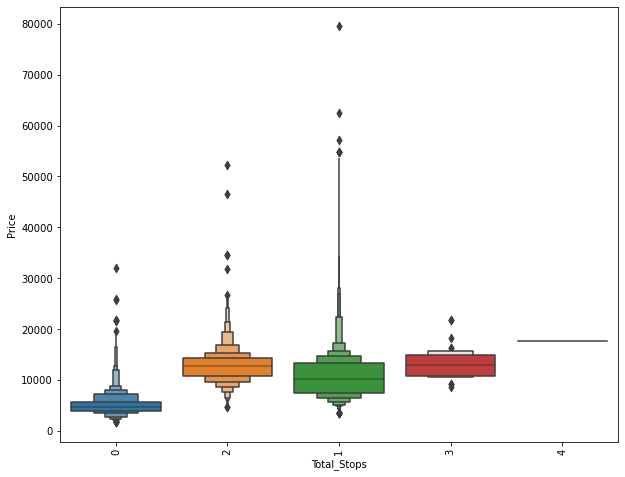

In [426]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.boxenplot(train_df['Total_Stops'],train_df['Price'])
plt.show()

Observations from above plot:
1. When the number of stops is higher, the ticket price is high.
2. It means that, the ticket price is high for the flights have longer journey with more number of stops.

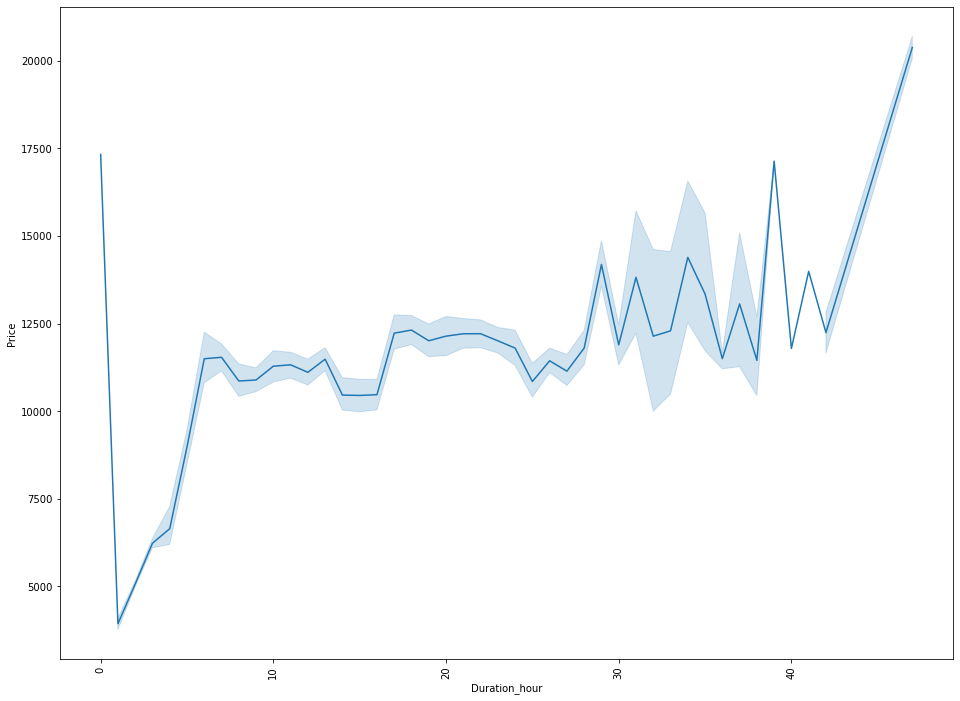

In [427]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.lineplot(train_df['Duration_hour'],train_df['Price'])
plt.show()

From the above plot we can observe that, when the duration hour increaases, the ticket price increases.

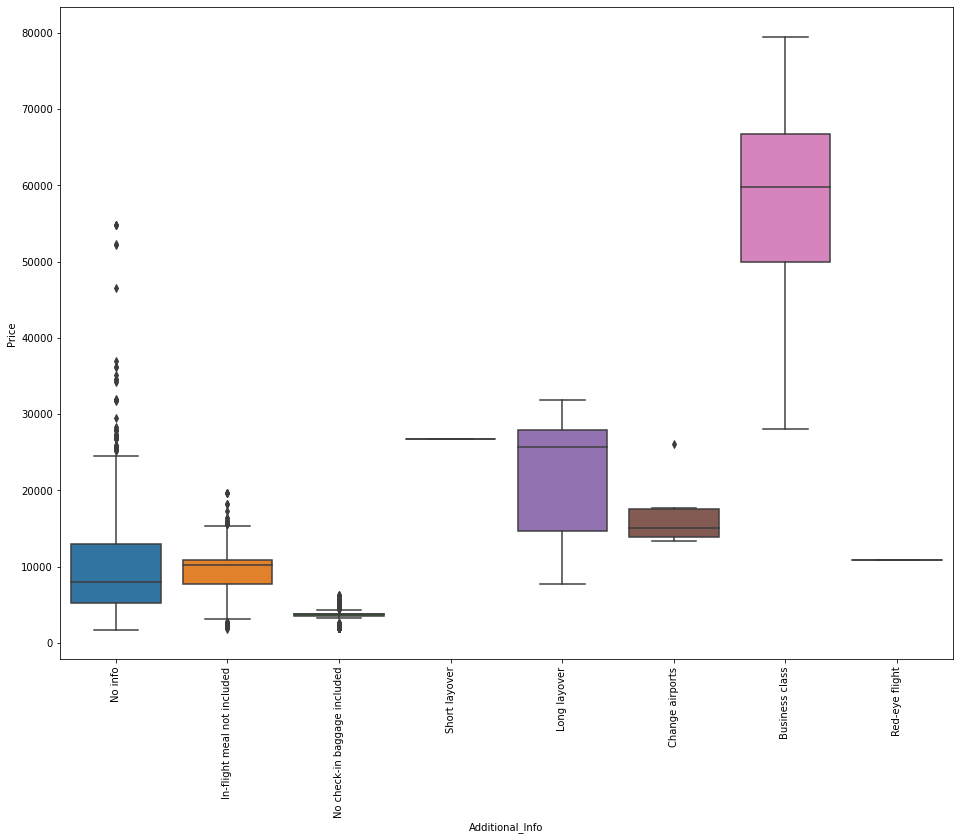

In [428]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.boxplot(train_df['Additional_Info'],train_df['Price'])
plt.show()

From the above plot we can observe that
1. From the above plot we can observe that price of the Business class is higher than others.

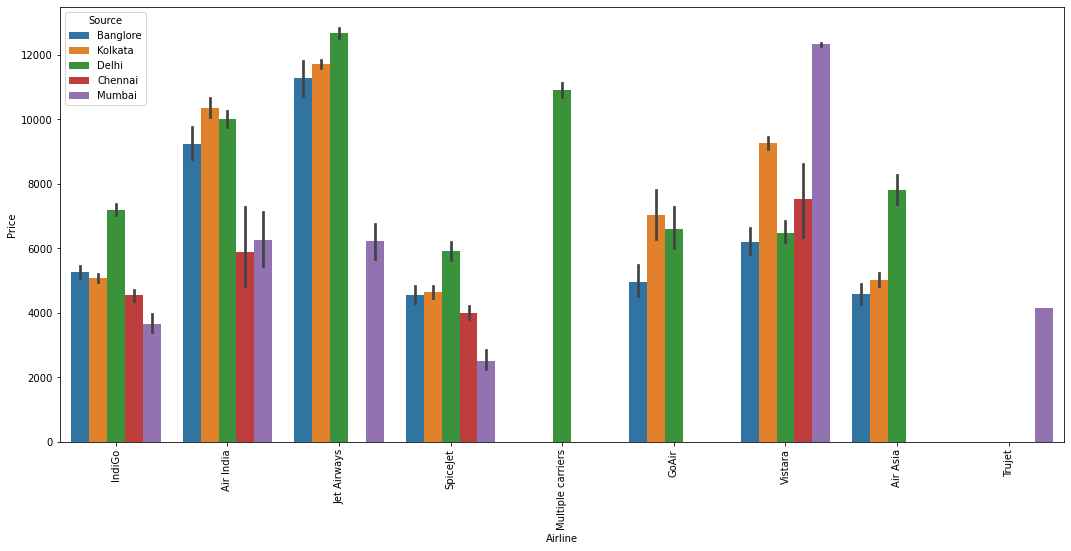

In [429]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot(train_df['Airline'],train_df['Price'],hue=train_df['Source'])
plt.show()

Observations from above plot:
1. The ticket price of Jet Airways flight from Delhi are costlier than other flights and followed by flights from Kolkata.
2. Multiple Carriers service has flights only from source location Delhi.
3. Trujet airline service has flights from Mumbai only.
4. Ticket price of Spicejet is lesser than other airline services.

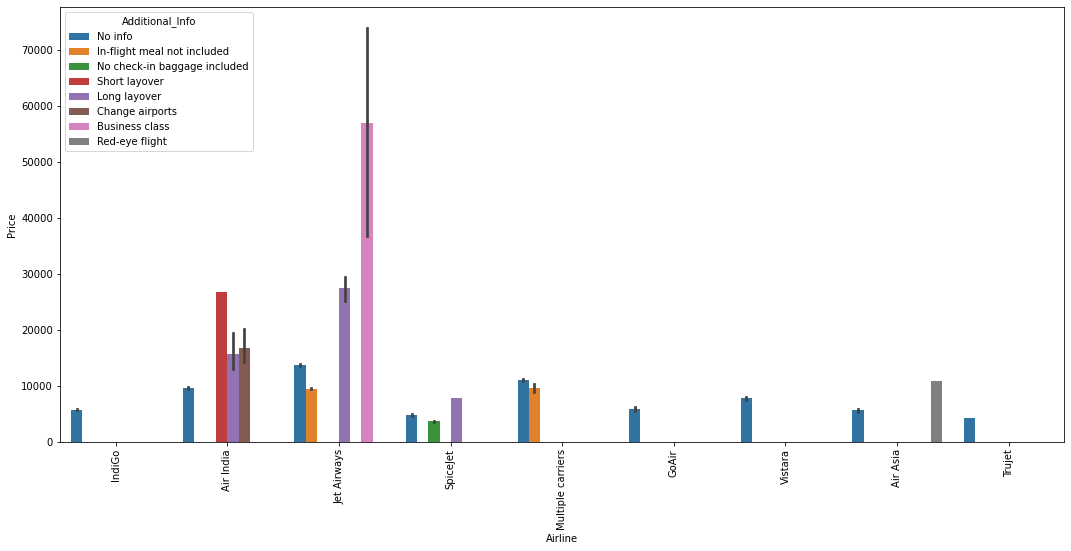

In [430]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot(train_df['Airline'],train_df['Price'],hue=train_df['Additional_Info'])
plt.show()

Observations from above plot:
1. Ticket price of JetAirways Business class is higher than other airline services.

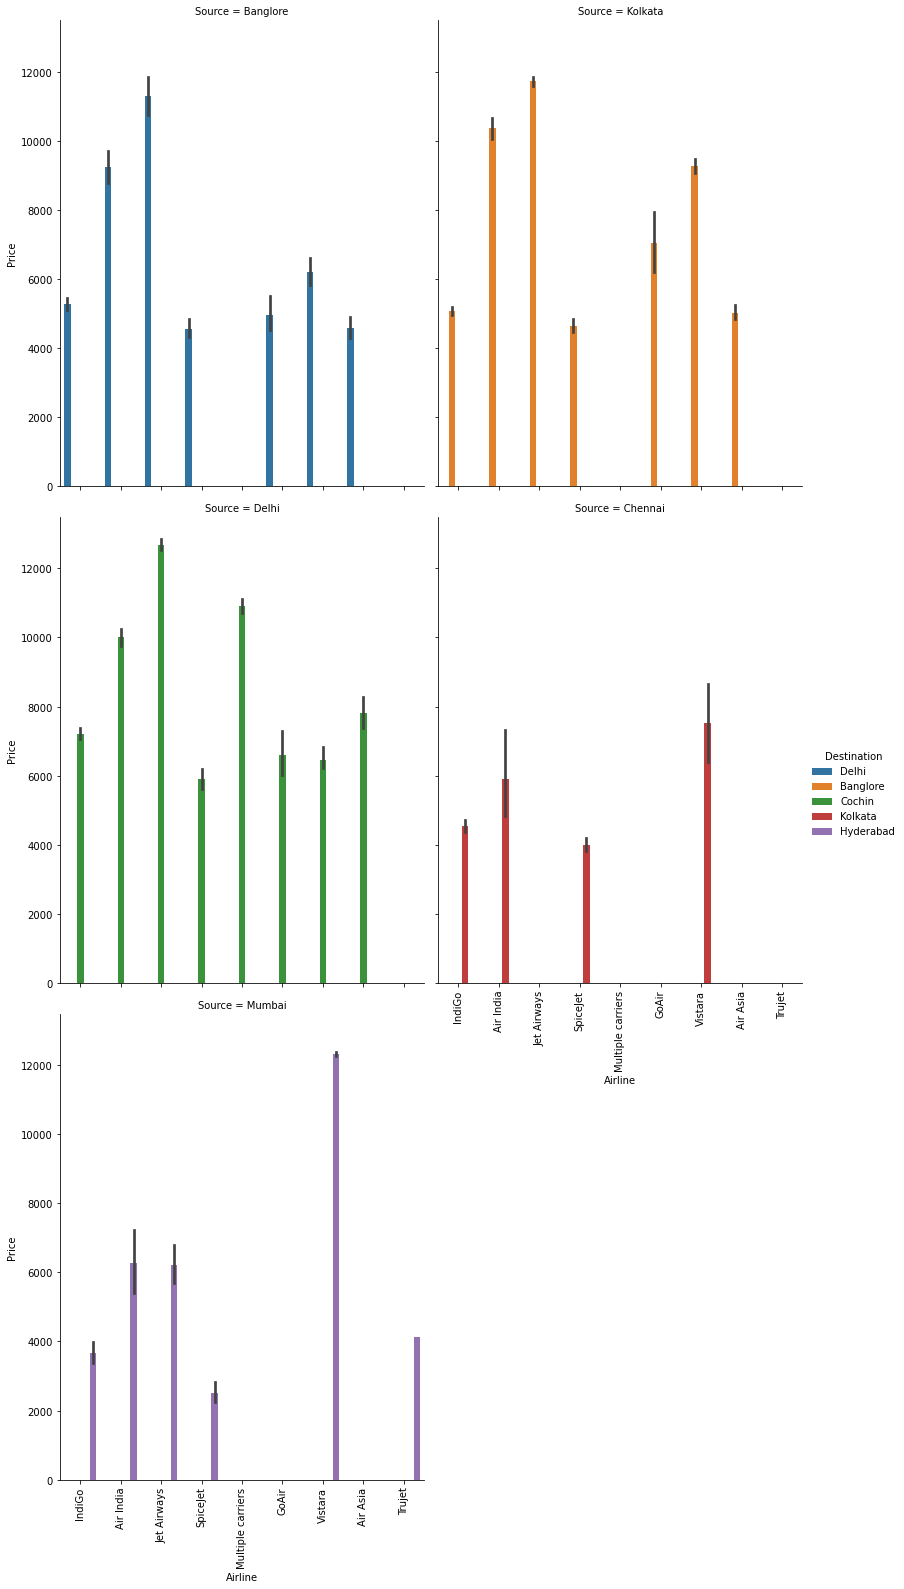

In [433]:
display=sns.catplot(x='Airline',y='Price',hue='Destination',col='Source',kind='bar',data=train_df,col_wrap=2,height=7, aspect=0.8,palette='tab10')
display.set_xticklabels(rotation=90,fontsize=10)
plt.show()

Observation from above plots:
1. The ticket price of the flights from Delhi to Cochin in Jet Airways airline services are costlier than all other flights.
2. The second highest ticket price is for the flights from Mumbai to Hyderabad in Vistara airlines.

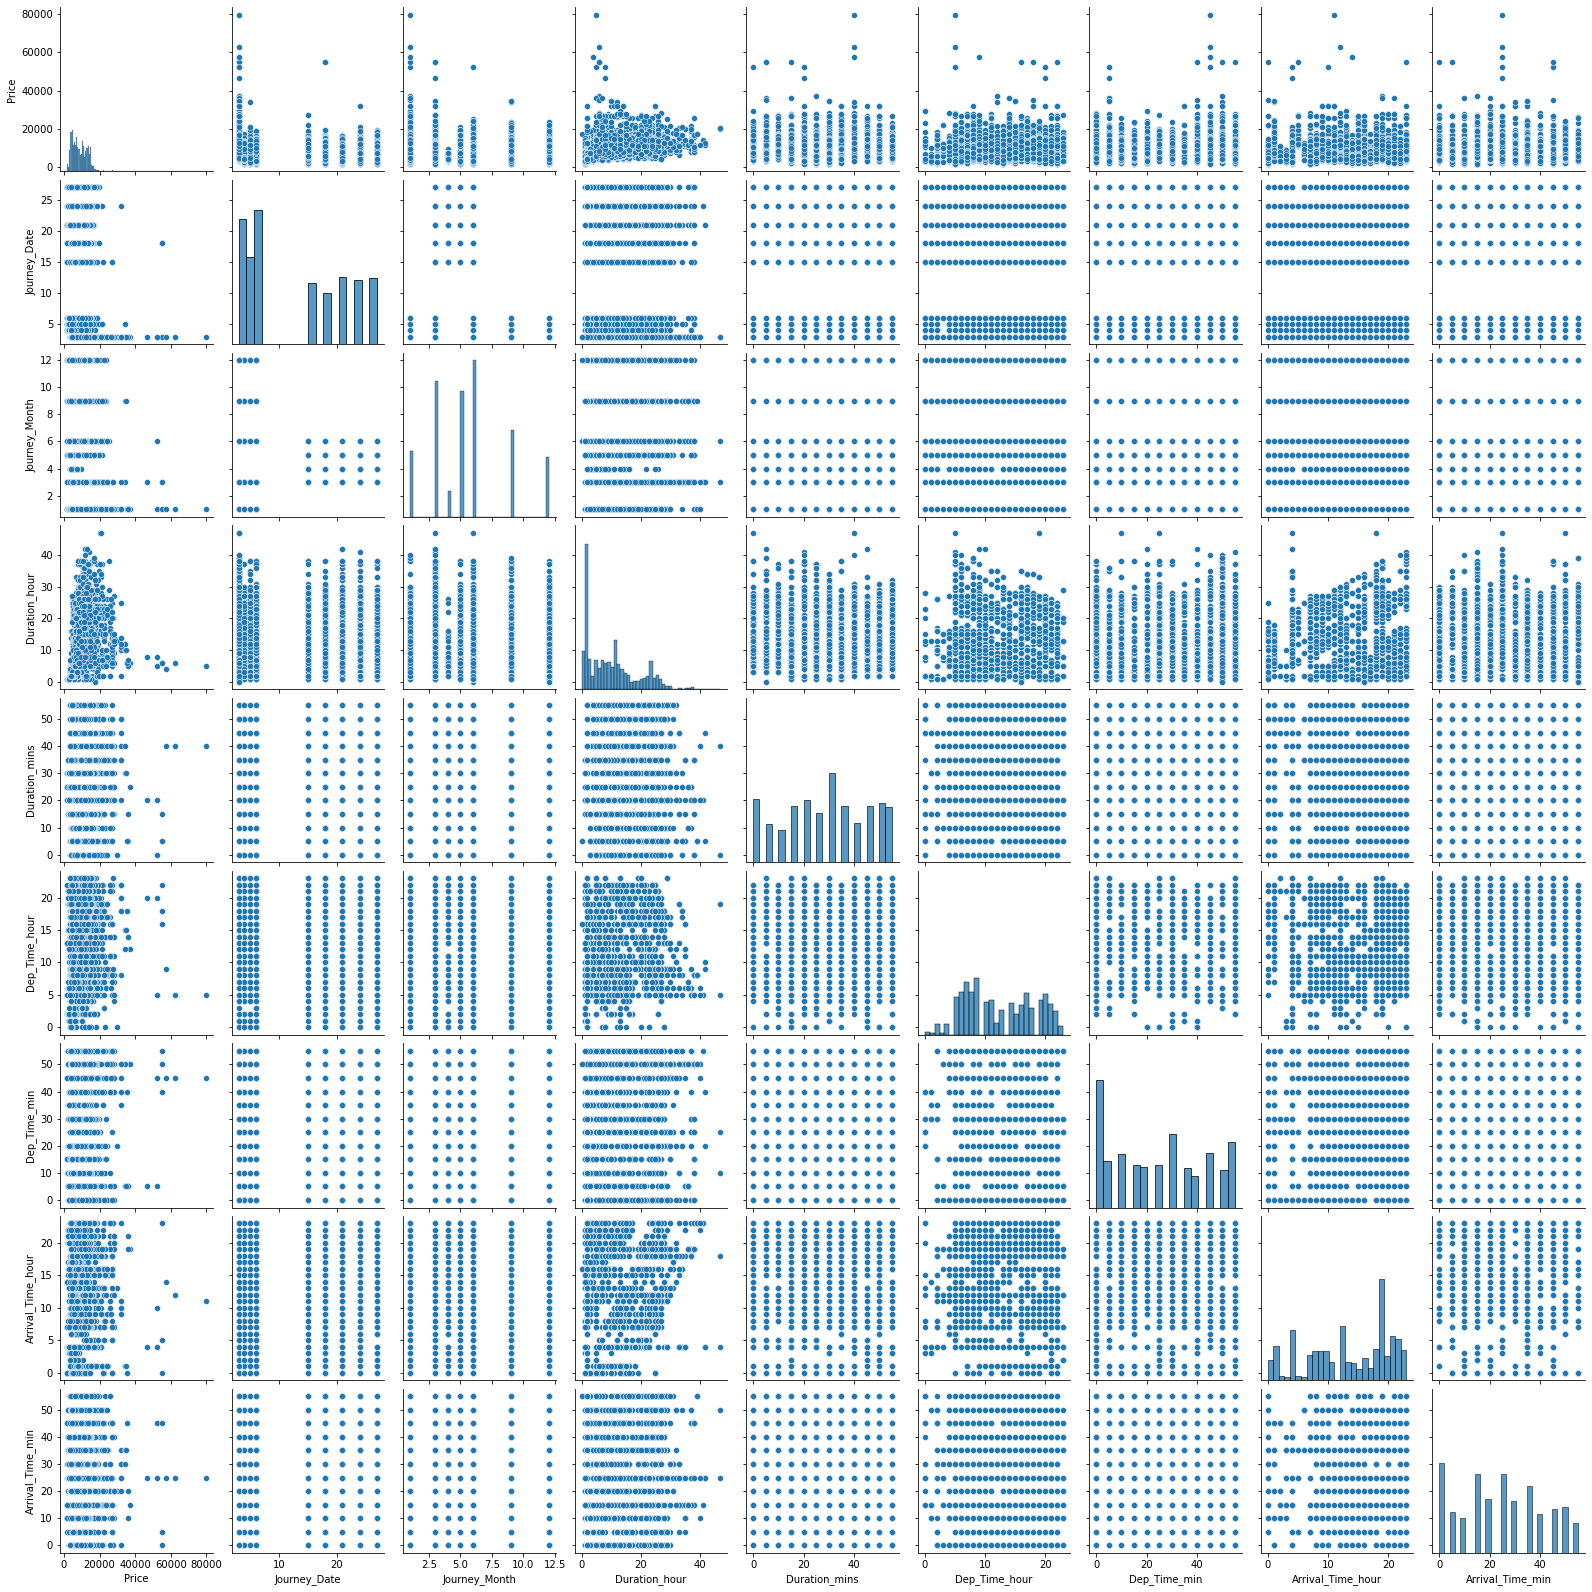

In [434]:
sns.pairplot(df)

### Filling missing values

In [41]:
df.isna().sum()

Airline                 0
Source                  0
Destination             0
Route                   1
Total_Stops             1
Additional_Info         0
Price                2671
DataSet                 0
Journey_Date            0
Journey_Month           0
Duration_hour           0
Duration_mins           0
Dep_Time_hour           0
Dep_Time_min            0
Arrival_Time_hour       0
Arrival_Time_min        0
dtype: int64

In [42]:
df['Route'].fillna(value=df['Route'].mode()[0],inplace=True)

In [43]:
df['Total_Stops'].fillna(value=df['Total_Stops'].mode()[0],inplace=True)

In [44]:
df.isna().sum()

Airline                 0
Source                  0
Destination             0
Route                   0
Total_Stops             0
Additional_Info         0
Price                2671
DataSet                 0
Journey_Date            0
Journey_Month           0
Duration_hour           0
Duration_mins           0
Dep_Time_hour           0
Dep_Time_min            0
Arrival_Time_hour       0
Arrival_Time_min        0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  object 
 1   Source             13354 non-null  object 
 2   Destination        13354 non-null  object 
 3   Route              13354 non-null  object 
 4   Total_Stops        13354 non-null  object 
 5   Additional_Info    13354 non-null  object 
 6   Price              10683 non-null  float64
 7   DataSet            13354 non-null  object 
 8   Journey_Date       13354 non-null  int64  
 9   Journey_Month      13354 non-null  int64  
 10  Duration_hour      13354 non-null  int32  
 11  Duration_mins      13354 non-null  int32  
 12  Dep_Time_hour      13354 non-null  int64  
 13  Dep_Time_min       13354 non-null  int64  
 14  Arrival_Time_hour  13354 non-null  int64  
 15  Arrival_Time_min   13354 non-null  int64  
dtypes: float64(1), int32(2)

##### We have 7 object type variable which need to be converted as numbers.

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
enc_features=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']
for col in enc_features:
    df[col]=LabelEncoder().fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            13354 non-null  int32  
 1   Source             13354 non-null  int32  
 2   Destination        13354 non-null  int32  
 3   Route              13354 non-null  int32  
 4   Total_Stops        13354 non-null  int32  
 5   Additional_Info    13354 non-null  int32  
 6   Price              10683 non-null  float64
 7   DataSet            13354 non-null  object 
 8   Journey_Date       13354 non-null  int64  
 9   Journey_Month      13354 non-null  int64  
 10  Duration_hour      13354 non-null  int32  
 11  Duration_mins      13354 non-null  int32  
 12  Dep_Time_hour      13354 non-null  int64  
 13  Dep_Time_min       13354 non-null  int64  
 14  Arrival_Time_hour  13354 non-null  int64  
 15  Arrival_Time_min   13354 non-null  int64  
dtypes: float64(1), int32(8)

In [48]:
train_df=df[df['DataSet']=='Train']
test_df=df[df['DataSet']=='Test']
print(train_df.shape,test_df.shape)

(10683, 16) (2671, 16)


### Checking MultiColinearity

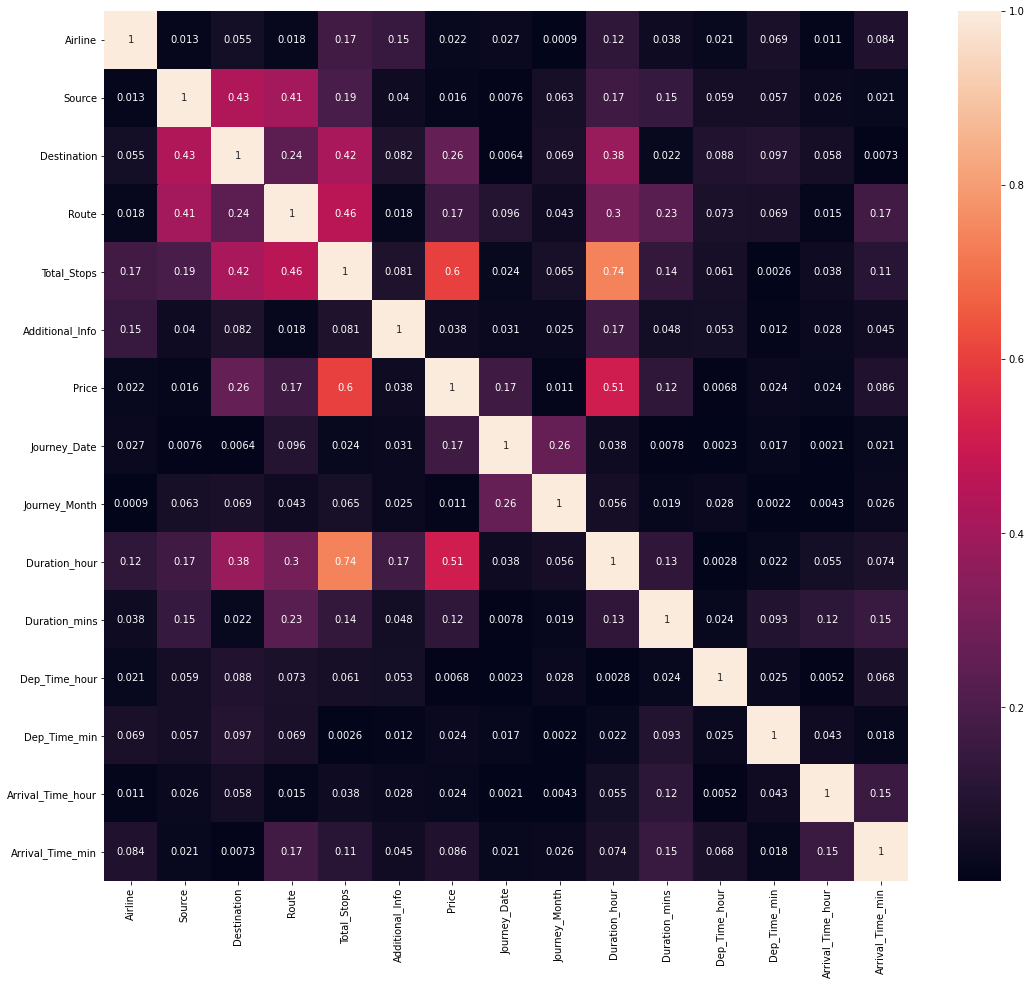

In [49]:
plt.figure(figsize=(18,16))
sns.heatmap(train_df.corr().abs(),annot=True)
plt.show()

Observations from the above plot:
1. There is no strong correlation between the features.
2. Total_Stops and Duration_hour is 74% correlated to each other.
3. Total_Stops and price is 60% correlated to each other.
4. Duration_hour is 51% correlated with target variable price.
5. Source and Destination are 43% correlated with each other.

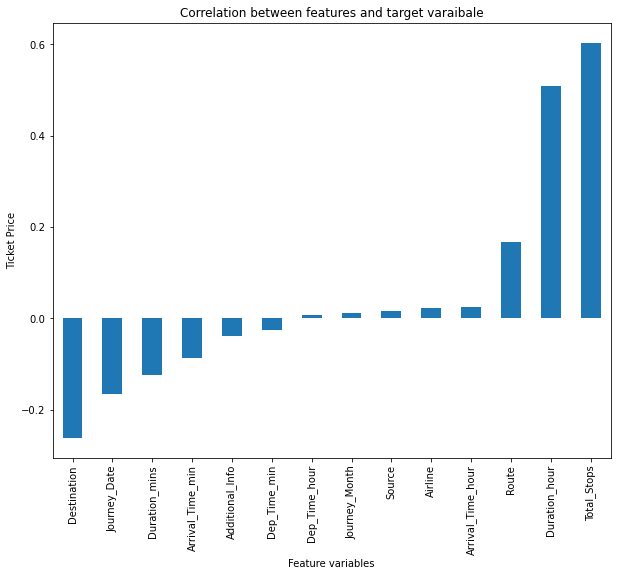

In [50]:
plt.figure(figsize=(10,8))
df.corr()['Price'].sort_values().drop(['Price']).plot(kind='bar')
plt.xlabel('Feature variables')
plt.ylabel('Ticket Price')
plt.xticks(rotation=90)
plt.title('Correlation between features and target varaibale')
plt.show()

From the above plot we can see that flight dep_time_hour has very less correlation with the target variable price.

### Checking Outliers

In [51]:
train_df=df[df['DataSet']=='Train']
test_df=df[df['DataSet']=='Test']
print(train_df.shape,test_df.shape)

(10683, 16) (2671, 16)


In [52]:
train_df.drop(['DataSet'],axis=1,inplace=True)

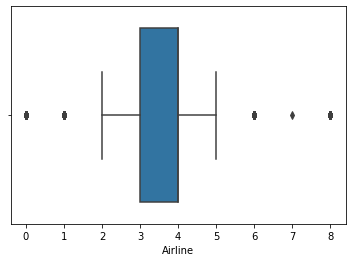

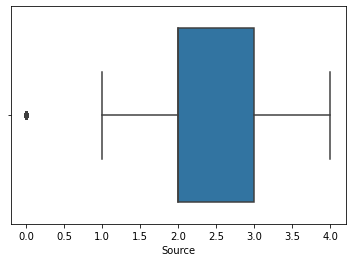

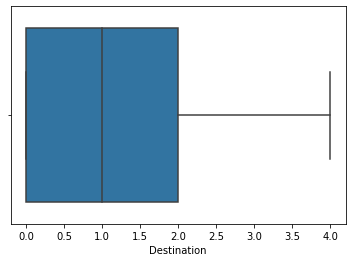

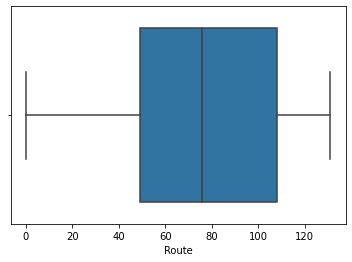

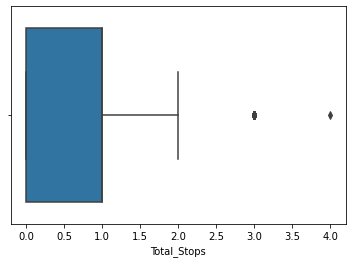

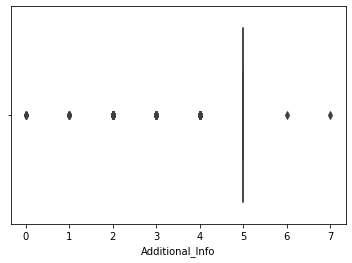

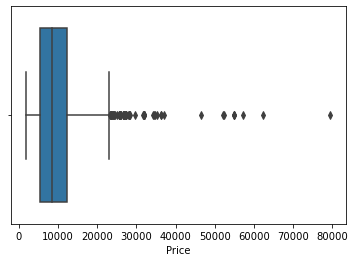

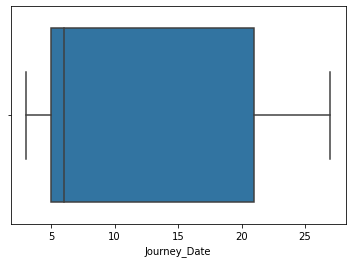

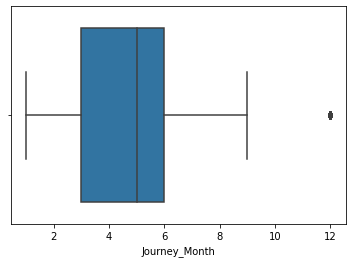

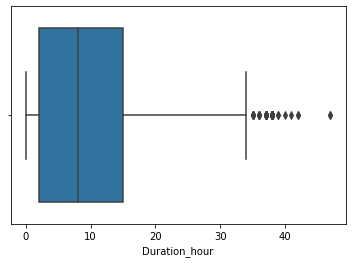

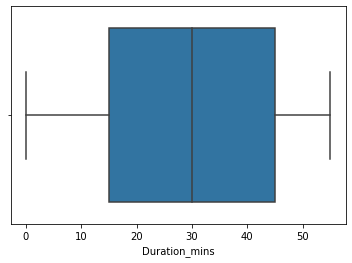

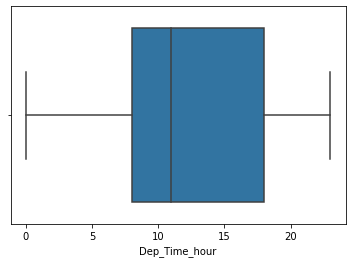

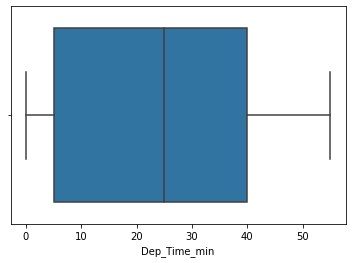

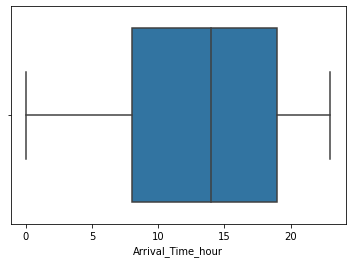

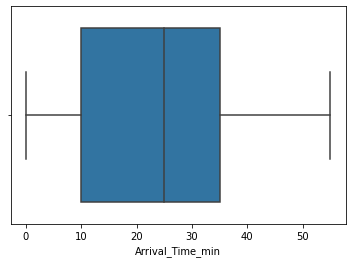

In [53]:
for col in train_df.columns:
    sns.boxplot(train_df[col])
    plt.show()

In [54]:
from scipy.stats import zscore

In [55]:
score=zscore(train_df['Duration_hour'])
filters=(score<3)
new_train_df=train_df[filters]
print(train_df.shape,new_train_df.shape)

(10683, 15) (10617, 15)


We removed 66 rows as part of outliers.

##### Data loss

In [56]:
data_loss=((train_df.shape[0]-new_train_df.shape[0])/train_df.shape[0])*100
data_loss

0.6178039876439202

we lost 0.6% of data as part of outlier removal

We can see that there is no outliers in the continous features.

#### Checking data skewness

In [57]:
new_train_df.skew().sort_values()

Additional_Info     -1.536287
Route               -0.516370
Source              -0.423207
Arrival_Time_hour   -0.361250
Duration_mins       -0.097354
Dep_Time_hour        0.103798
Arrival_Time_min     0.107805
Airline              0.132890
Dep_Time_min         0.164551
Total_Stops          0.298472
Journey_Date         0.367029
Journey_Month        0.628224
Duration_hour        0.761022
Destination          0.843497
Price                1.824502
dtype: float64

In [58]:
from sklearn.preprocessing import PowerTransformer
new_train_df[['Duration_hour','Journey_Month']]=PowerTransformer().fit_transform(new_train_df[['Duration_hour','Journey_Month']])

In [59]:
new_train_df.skew().sort_values()

Additional_Info     -1.536287
Route               -0.516370
Source              -0.423207
Arrival_Time_hour   -0.361250
Duration_mins       -0.097354
Duration_hour       -0.033470
Journey_Month       -0.026556
Dep_Time_hour        0.103798
Arrival_Time_min     0.107805
Airline              0.132890
Dep_Time_min         0.164551
Total_Stops          0.298472
Journey_Date         0.367029
Destination          0.843497
Price                1.824502
dtype: float64

We do not have skewness in any of the continous variables.

## Model Building

In [60]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
import xgboost
from xgboost import XGBRegressor

In [61]:
X=new_train_df.drop(['Price'],axis=1)
y=new_train_df['Price']

In [62]:
from sklearn.preprocessing import StandardScaler
X_sc=pd.DataFrame(StandardScaler().fit_transform(X))

##### Checking multi colinearity using VIF

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(X_sc.values,i) for i in range(len(X_sc.columns))]
vif['Features'] = X_sc.columns
vif.sort_values(by='VIF values',ascending=False)

,VIF values,Features
8,3.611326,8
4,3.495405,4
2,1.655362,2
3,1.616140,3
1,1.505319,1
9,1.123801,9
13,1.098854,13
5,1.098515,5
0,1.090589,0
6,1.055016,6


In [65]:
print(X.shape,y.shape)

(10617, 14) (10617,)


##### Finding best random state

In [66]:
m_acc=0
rs=0
for i in range(1,100):
    X_train,X_val,y_train,y_val=train_test_split(X_sc,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_val)
    acc=r2_score(y_val,y_pred)
    if(acc>m_acc):
        m_acc=acc
        rs=i
print('Accuracy: ',m_acc,'RS: ',rs)

Accuracy:  0.5230604642194387 RS:  52


In [67]:
X_train,X_val,y_train,y_val=train_test_split(X_sc,y,test_size=0.25,random_state=52)

### Building base models

In [68]:
lr=LinearRegression()
rf_reg=RandomForestRegressor()
dt_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
gb_reg=GradientBoostingRegressor()
ls=Lasso()
xgb=XGBRegressor()

In [69]:
model=[lr,rf_reg,dt_reg,kn_reg,xgb,ls,gb_reg]
for m in model:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_val)
    print('Metrics for ',m)
    print('Accuracy score: ',r2_score(y_val,y_pred))
    print('Mean Absolute Error: ',mean_absolute_error(y_val,y_pred))
    print('Mean Squared Error: ',np.sqrt(mean_squared_error(y_val,y_pred)),'\n')


Metrics for  LinearRegression()
Accuracy score:  0.5230604642194387
Mean Absolute Error:  2305.333848048161
Mean Squared Error:  3070.1222576603695 

Metrics for  RandomForestRegressor()
Accuracy score:  0.9081664105028848
Mean Absolute Error:  642.9421102412339
Mean Squared Error:  1347.177397652226 

Metrics for  DecisionTreeRegressor()
Accuracy score:  0.8476546264426402
Mean Absolute Error:  725.775455116133
Mean Squared Error:  1735.1564657005545 

Metrics for  KNeighborsRegressor()
Accuracy score:  0.7609478460303201
Mean Absolute Error:  1364.7463653483992
Mean Squared Error:  2173.5535203701265 

Metrics for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constr

#### Cross validation 

In [70]:
for m in model:
    print("Cross val score for ",m,cross_val_score(m,X_sc,y,cv=5).mean())

Cross val score for  LinearRegression() 0.46279388799860116
Cross val score for  RandomForestRegressor() 0.880541194272576
Cross val score for  DecisionTreeRegressor() 0.8118039415366274
Cross val score for  KNeighborsRegressor() 0.7335255529128839
Cross val score for  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 0.8970402946833227
Cross val score for  Lasso() 0.4627962567741501
Cross val score for  GradientBoost

Based on base model score and cross validation score and RMSE value XGBRegressor works fine for our dataset.

### Final model - XGBRegressor

##### Hyper Parameter Tuning

In [76]:
from sklearn.model_selection import GridSearchCV

In [86]:
param={'n_estimators':[100,130,150]}
grd_srch=GridSearchCV(XGBRegressor(),param_grid=param,n_jobs=-1)
grd_srch.fit(X_train,y_train)
print(grd_srch.best_estimator_)
print(grd_srch.best_params_)
print(grd_srch.best_score_)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
{'n_estimators': 150}
0.8706793341050456


In [100]:
r_mean=0
rs=0
for i in range(1,10):
    gb_reg=XGBRegressor(n_estimators=150,random_state=i)
    gb_reg.fit(X_train,y_train)
    y_pred=gb_reg.predict(X_val)
    r_mean_square=np.sqrt(mean_squared_error(y_val,y_pred))
    if(r_mean==0):
        r_mean=r_mean_square
    elif(r_mean_square<r_mean):
        r_mean=r_mean_square
        rs=i
print("Best error: ",r_mean,"RS: ",rs)
gb_reg=XGBRegressor(n_estimators=150,random_state=i)
gb_reg.fit(X_train,y_train)
y_pred=gb_reg.predict(X_val)
print('Accuracy: ',r2_score(y_val,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_val,y_pred))
print('Mean Squared Error: ',mean_squared_error(y_val,y_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_val,y_pred)))

Best error:  1203.100239500215 RS:  0
Accuracy:  0.9267587731000495
Mean Absolute Error:  680.4934450311176
Mean Squared Error:  1447450.1862854746
Root Mean Squared Error:  1203.100239500215


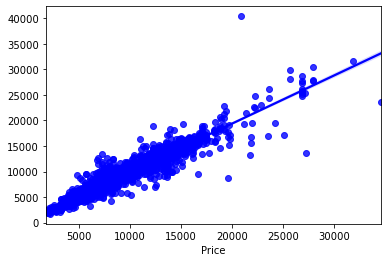

In [104]:
sns.regplot(y_val,y_pred,color='b')
plt.show()

The above plot shows the best fit line for our final model.

##### We able to build a model with 93% of accuracy and Root Mean Squared value with 1203.

### Saving the model

In [105]:
import pickle

In [106]:
pickle.dump(gb_reg,open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/FlightPricePrediction.pkl','wb'))

In [107]:
final_model=pickle.load(open('C:/Users/yn/Desktop/Yuvi/DataTrained/Saved Models - Evaluation Projects/FlightPricePrediction.pkl','rb'))

### Predicting the price for test data

In [108]:
test_data=test_df
test_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'DataSet', 'Journey_Date', 'Journey_Month',
       'Duration_hour', 'Duration_mins', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min'],
      dtype='object')

##### Droping the unnecessary columns

In [109]:
test_data=test_df.drop(['Price','DataSet'],axis=1)

##### Removing skewness

In [110]:
test_data.skew().sort_values()

Additional_Info     -1.723465
Route               -0.520430
Arrival_Time_hour   -0.443166
Source              -0.424997
Duration_mins       -0.104482
Dep_Time_hour        0.093759
Arrival_Time_min     0.115267
Airline              0.127529
Dep_Time_min         0.128515
Total_Stops          0.321364
Journey_Date         0.478246
Journey_Month        0.590701
Destination          0.794526
Duration_hour        0.884647
dtype: float64

In [111]:
from sklearn.preprocessing import PowerTransformer
test_data[['Duration_hour','Journey_Month']]=PowerTransformer().fit_transform(test_data[['Duration_hour','Journey_Month']])

In [112]:
test_data.skew().sort_values()

Additional_Info     -1.723465
Route               -0.520430
Arrival_Time_hour   -0.443166
Source              -0.424997
Duration_mins       -0.104482
Duration_hour       -0.033956
Journey_Month       -0.032442
Dep_Time_hour        0.093759
Arrival_Time_min     0.115267
Airline              0.127529
Dep_Time_min         0.128515
Total_Stops          0.321364
Journey_Date         0.478246
Destination          0.794526
dtype: float64

##### Scaling the test data

In [113]:
test_data_sc=StandardScaler().fit_transform(test_data)

##### Predicting the result using the model which is bulid with train data

In [114]:
prediction=final_model.predict(test_data_sc)
result=pd.DataFrame({'Price':prediction})
result

,Price
0,14493.757812
1,4353.931152
2,12350.174805
3,10948.339844
4,3345.806641
...,...
2666,10068.174805
2667,4655.435059
2668,16149.625000
2669,12638.090820
